Question 1

In [1]:
import cv2
import numpy as np

In [2]:
import math

In [3]:
import matplotlib.pyplot as plt

In [4]:
xray_img = cv2.imread("xray.png",-1)
xray_img.shape

(1024, 1024)

(-0.5, 1023.5, 1023.5, -0.5)

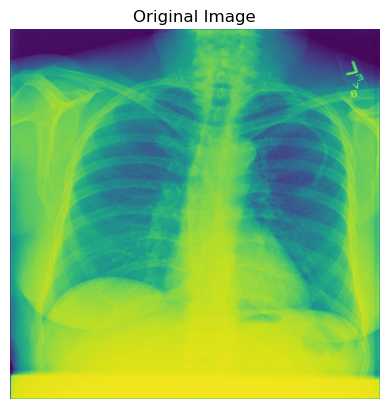

In [5]:
plt.imshow(xray_img)
plt.title("Original Image")
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

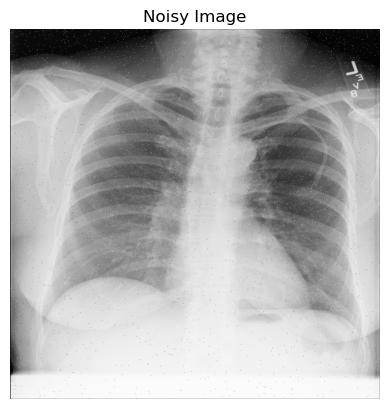

In [6]:
noisy_img = cv2.imread("xray_sp.png",-1)
plt.imshow(noisy_img,cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

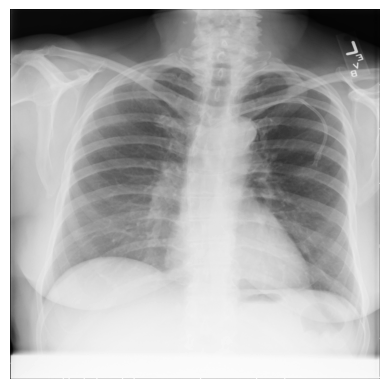

In [7]:
#median filter
median_filtered_img = cv2.medianBlur(noisy_img,3) #3 kernel 
plt.imshow(median_filtered_img,cmap='gray')
plt.axis('off')

In [8]:
cv2.imwrite("median_filtered_img.png",median_filtered_img)

True

In [9]:
def rmse(img1,img2):
    mse = np.square(np.subtract(img1,img2)).mean()
    rmse = math.sqrt(mse)
    return rmse

In [10]:
rmse_median_filter = rmse(xray_img,median_filtered_img)

In [11]:
print(f"RMSE of Median Filtered Image: {rmse_median_filter}")

RMSE of Median Filtered Image: 1.017037216780872


In [12]:
def snr(filtered_img,original_img):
    num = np.square(filtered_img).sum()
    diff_sq = np.square(filtered_img - original_img)
    denom = np.sum(diff_sq)
    snr = num/denom
    return snr

In [13]:
snr_median_filter = snr(median_filtered_img,xray_img)

In [14]:
print(f"SNR of Median Filtered Image: {snr_median_filter}")

SNR of Median Filtered Image: 104.28556070845742


In [15]:
def zero_padding(img,kernel_size):
    h,w = img.shape
    padding = kernel_size//2
    new_h = h+padding*2
    new_w = padding*2 + w
    temp = np.zeros((new_h,new_w))
    for i in range(h):
        for j in range(w):
            temp[i+padding,j+padding] = img[i,j]
    return temp

In [16]:
def max_filter(img,kernel_size):
    padded_img = zero_padding(img,kernel_size)
    padding = kernel_size//2
    final = np.ones((padded_img.shape[0]-2*padding,padded_img.shape[1]-2*padding))
    for i in range(padding,padded_img.shape[0]-padding):
        for j in range(padding,padded_img.shape[1]-padding): #i,j is the centre pixel
            temp = padded_img[i-padding:i+padding+1,j-padding:j+padding+1]
            max_temp = np.max(temp)
            final[i-padding,j-padding] = max_temp
    return final

In [17]:
max_filtered_img = max_filter(noisy_img,3)

In [18]:
max_filtered_img.shape

(1024, 1024)

(-0.5, 1023.5, 1023.5, -0.5)

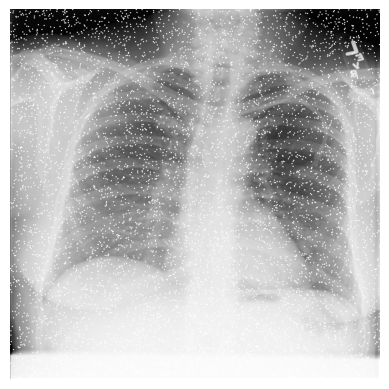

In [19]:
plt.imshow(max_filtered_img,cmap="gray")
plt.axis('off')

In [20]:
cv2.imwrite("Max_Filter.png",max_filtered_img)

True

In [21]:
rmse_max_filter = rmse(xray_img,max_filtered_img)
snr_max_filter = snr(max_filtered_img,xray_img)

In [22]:
print(f"RMSE of Max Filter: {rmse_max_filter}")
print(f"SNR of Max Filter: {snr_max_filter}")

RMSE of Max Filter: 25.95361160474386
SNR of Max Filter: 52.47334541130218


In [23]:
def min_filter(img,kernel_size):
    padded_img = zero_padding(img,kernel_size)
    padding = kernel_size//2
    final = np.ones((padded_img.shape[0]-2*padding,padded_img.shape[1]-2*padding))
    for i in range(padding,padded_img.shape[0]-padding):
        for j in range(padding,padded_img.shape[1]-padding): #i,j is the centre pixel
            temp = padded_img[i-padding:i+padding+1,j-padding:j+padding+1]
            min_temp = np.min(temp)
            final[i-padding,j-padding] = min_temp
    return final

In [24]:
min_filtered_img = min_filter(noisy_img, 3)

(-0.5, 1023.5, 1023.5, -0.5)

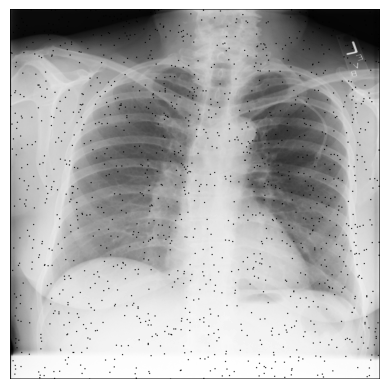

In [25]:
plt.imshow(min_filtered_img,cmap="gray")
plt.axis('off')

In [26]:
cv2.imwrite("Min_Filter.png",min_filtered_img)

True

In [27]:
rmse_min_filter = rmse(xray_img,min_filtered_img)
snr_min_filter = snr(min_filtered_img,xray_img)
print(f"RMSE of Min Filter: {rmse_min_filter}")
print(f"SNR of Min Filter: {snr_min_filter}")

RMSE of Min Filter: 20.75023186795397
SNR of Min Filter: 73.26402189026705


In [28]:
min_after_max_filter = min_filter(max_filtered_img,5)

(-0.5, 1023.5, 1023.5, -0.5)

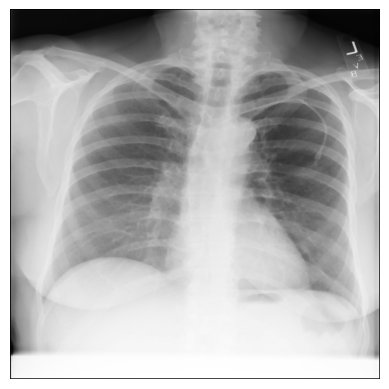

In [29]:
plt.imshow(min_after_max_filter,cmap='gray')
plt.axis('off')

In [30]:
cv2.imwrite("Min Filter on Max Filtered Image.png",min_after_max_filter)

True

Therefore, a combination of max and min filters gives a good result for salt and pepper noise

In [31]:
rmse_min_max_filter = rmse(xray_img,min_after_max_filter)
snr_min_max_filter = snr(min_after_max_filter,xray_img)
print(f"RMSE of Min Filter: {rmse_min_max_filter}")
print(f"SNR of Min Filter: {snr_min_max_filter}")

RMSE of Min Filter: 12.904896921531721
SNR of Min Filter: 193.65637872382547


In [32]:
def alpha_trim(arr,d):
    l = arr.flatten()
    l.sort()
    p = arr.flatten()
    temp = []
    count = 0
    for i in range(0, d//2):
        temp.append(l[count])
        temp.append(l[l.shape[0] - count - 1])
        count += 1 
    for i in temp:
        for j in range(len(p)):
            if i == p[j]:
                p[j] = 0
    p = p.reshape(arr.shape)
    return p

In [33]:
def alpha_trimmed_mean_filter(img,d,kernel_size):
    padded_img = zero_padding(img,kernel_size)
    padding = kernel_size//2
    final = np.ones((padded_img.shape[0]-2*padding,padded_img.shape[1]-2*padding))
    for i in range(padding,padded_img.shape[0]-padding):
        for j in range(padding,padded_img.shape[1]-padding): #i,j is the centre pixel
            temp = padded_img[i-padding:i+padding+1,j-padding:j+padding+1]
            alpha_trim_temp = alpha_trim(temp,d)
            final[i-padding,j-padding] = alpha_trim_temp.sum()/(kernel_size**2 - d)
    return final

In [34]:
alpha_trimmed_xray_img = alpha_trimmed_mean_filter(noisy_img,0,3)

In [35]:
alpha_trimmed_xray_img = cv2.normalize(alpha_trimmed_xray_img,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)

(-0.5, 1023.5, 1023.5, -0.5)

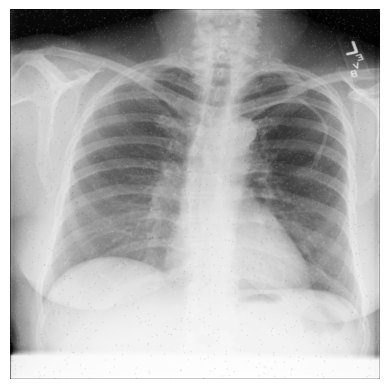

In [36]:
plt.imshow(alpha_trimmed_xray_img,cmap='gray')
plt.axis('off')

In [37]:
cv2.imwrite("Alpha Trimmed Mean Filter.png",alpha_trimmed_xray_img)

True

In [38]:
rmse_alpha_filter = rmse(xray_img,alpha_trimmed_xray_img)
snr_alpha_filter = snr(alpha_trimmed_xray_img,xray_img)
print(f"RMSE of Min Filter: {rmse_alpha_filter}")
print(f"SNR of Min Filter: {snr_alpha_filter}")

RMSE of Min Filter: 2.9916151809158267
SNR of Min Filter: 11.873326829704924


Question 2

In [39]:
noisy = cv2.imread("xray_g.png",-1)

In [40]:
noisy_float = np.float64(noisy)
xray_fourier = cv2.dft(noisy_float,flags = cv2.DFT_COMPLEX_OUTPUT)

In [41]:
xray_fourier_shift = np.fft.fftshift(xray_fourier)
xray_fourier_shift.shape

(1024, 1024, 2)

In [42]:
magnitude = 20*np.log(cv2.magnitude(xray_fourier_shift[:,:,0],xray_fourier_shift[:,:,1]))

In [43]:
magnitude= cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)


(-0.5, 1023.5, 1023.5, -0.5)

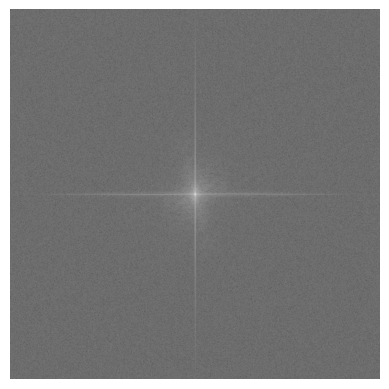

In [44]:
plt.imshow(magnitude,cmap='gray')
plt.axis('off')

In [45]:
#box filter
box = np.zeros(xray_fourier_shift.shape)
M,N = xray_img.shape

In [46]:
for i in range(0, M):
    for j in range(0,N):
        z = math.sqrt(((M/2-i)**2 + (N/2-j)**2))
        if z<100:
            box[i,j] = 1

In [47]:
box.shape

(1024, 1024, 2)

(-0.5, 1023.5, 1023.5, -0.5)

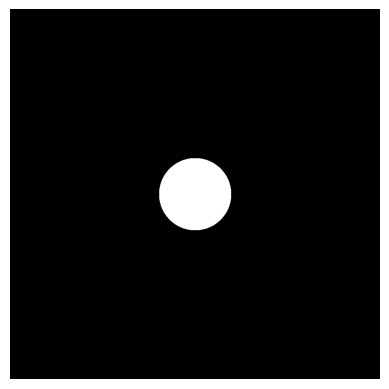

In [50]:
box_channel = box[:,:,1]
plt.imshow(box_channel,cmap='gray')
plt.axis('off')

In [51]:
#gaussian
D0 = 100
gaussian = np.zeros(xray_fourier_shift.shape)
for i in range(0, M):
    for j in range(0,N):
        z = math.sqrt(((M/2-i)**2 + (N/2-j)**2))
        gaussian[i,j] = math.exp((-z**2)/(2*D0**2))

(-0.5, 1023.5, 1023.5, -0.5)

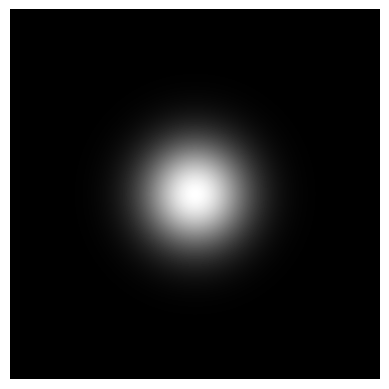

In [53]:
gaussian_channel = gaussian[:,:,1]
plt.imshow(gaussian_channel,cmap='gray')
plt.axis('off')

In [56]:
#Butterworth LPF
D0 = 300
n = 3
butter = np.zeros(xray_fourier_shift.shape)
for i in range(0, M):
    for j in range(0,N):
        z = math.sqrt(((M/2-i)**2 + (N/2-j)**2))
        butter[i,j] = 1/(1+(math.exp(z/D0))**(2*n))

(-0.5, 1023.5, 1023.5, -0.5)

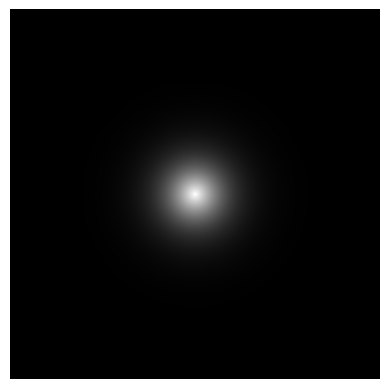

In [58]:
butter_channel = butter[:,:,1]
plt.imshow(butter_channel,cmap='gray')
plt.axis('off')

In [59]:
fshift = xray_fourier_shift*box

In [60]:
f_ishift = np.fft.ifftshift(fshift)

In [61]:
img_back = cv2.idft(f_ishift)

In [62]:
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [63]:
img_back = cv2.normalize(img_back,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)

(-0.5, 1023.5, 1023.5, -0.5)

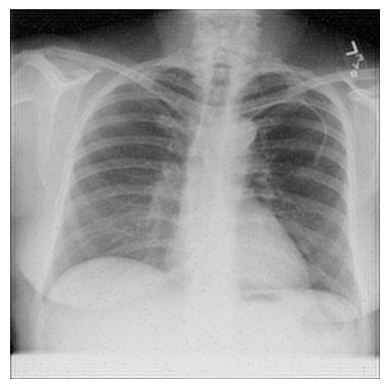

In [64]:
plt.imshow(img_back,cmap='gray')
plt.axis('off')

In [65]:
cv2.imwrite("Fourier_BOX.png",img_back)

True

In [66]:
fshift_gaussian = xray_fourier_shift*gaussian
f_ishift_gaussian = np.fft.ifftshift(fshift_gaussian)
img_back_gaussian = cv2.idft(f_ishift_gaussian)
img_back_gaussian = cv2.magnitude(img_back_gaussian[:,:,0],img_back_gaussian[:,:,1])
img_back_gaussian = cv2.normalize(img_back_gaussian,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)

(-0.5, 1023.5, 1023.5, -0.5)

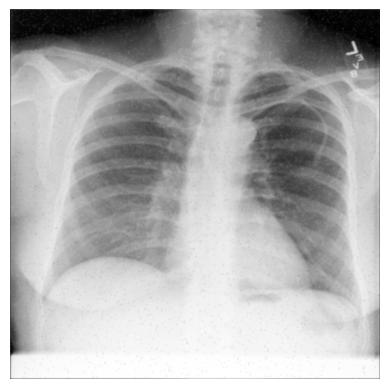

In [67]:
plt.imshow(img_back_gaussian,cmap='gray')
plt.axis('off')

In [68]:
cv2.imwrite("Fourier_GAUSSIAN.png",img_back_gaussian)

True

In [69]:
fshift_butter = xray_fourier_shift*butter
f_ishift_butter = np.fft.ifftshift(fshift_butter)
img_back_butter = cv2.idft(f_ishift_butter)
img_back_butter = cv2.magnitude(img_back_butter[:,:,0],img_back_butter[:,:,1])
img_back_butter = cv2.normalize(img_back_butter,None,0,255,cv2.NORM_MINMAX,cv2.CV_8UC1)

(-0.5, 1023.5, 1023.5, -0.5)

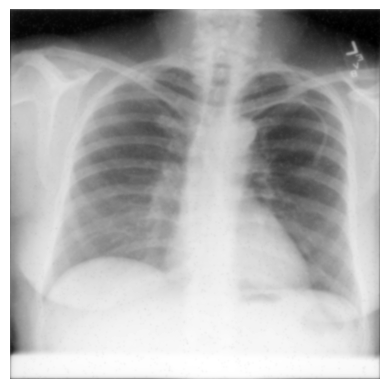

In [70]:
plt.imshow(img_back_butter,cmap='gray')
plt.axis('off')

In [71]:
cv2.imwrite("Fourier_BUTTERWORTH.png",img_back_butter)

True

In [72]:
#RMSE and SNR values
rmse_box = rmse(xray_img,img_back)
rmse_gaussian = rmse(xray_img,img_back_gaussian)
rmse_butter = rmse(xray_img,img_back_butter)

In [73]:
snr_box = snr(img_back,xray_img)
snr_gaussian = snr(img_back_gaussian,xray_img)
snr_butter = snr(img_back_butter,xray_img)

In [74]:
print(f"Box Filter: RMSE = {rmse_box} | SNR = {snr_box}")
print(f"Gaussian Filter: RMSE = {rmse_gaussian} | SNR = {snr_gaussian}")
print(f"Butterworth Filter: RMSE = {rmse_butter} | SNR = {snr_butter}")

Box Filter: RMSE = 10.242325445042047 | SNR = 1.033821295998412
Gaussian Filter: RMSE = 4.013769292461323 | SNR = 6.5852544142753295
Butterworth Filter: RMSE = 4.275206706978054 | SNR = 5.871659126538234
